In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Company Stock and Investment.csv', parse_dates=['Date'])

In [3]:
df.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,2009-12-31,0.025417,0.000150,0.017354,0.006848
1,2010-04-01,0.026830,0.001097,0.015565,-0.004609
2,2010-05-01,0.002699,0.001560,0.001729,0.005900
3,2010-06-01,0.021688,0.006009,-0.015906,-0.018116
4,2010-07-01,-0.006256,0.000221,-0.001849,-0.017013


In [4]:
#Converting Month into Datetime
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,2009-12-31,0.025417,0.000150,0.017354,0.006848
1,2010-04-01,0.026830,0.001097,0.015565,-0.004609
2,2010-05-01,0.002699,0.001560,0.001729,0.005900
3,2010-06-01,0.021688,0.006009,-0.015906,-0.018116
4,2010-07-01,-0.006256,0.000221,-0.001849,-0.017013


In [5]:
#Checking the data type
df.dtypes

Date                       datetime64[ns]
Oil Investments                   float64
Gold Investments                  float64
Comp Stock                        float64
Other sharesInvestments           float64
dtype: object

In [6]:
# Creating the first model
df1 = df[['Date','Gold Investments']]

In [7]:
#Checking the top five rows
df1.head()

,Date,Gold Investments
0,2009-12-31,0.000150
1,2010-04-01,0.001097
2,2010-05-01,0.001560
3,2010-06-01,0.006009
4,2010-07-01,0.000221


In [8]:
#Checking the last five rows
df1.tail()

,Date,Gold Investments
1979,2017-09-11,0.000623
1980,2017-10-11,-0.000389
1981,2017-11-13,-0.004944
1982,2017-11-14,-0.002621
1983,2017-11-15,0.005963


In [9]:
df1.dtypes

Date                datetime64[ns]
Gold Investments           float64
dtype: object

In [10]:
#Checking for null values
df1.isnull().values.any()

False

In [11]:
#checking the null values in columns
df1.isnull().sum()

Date                0
Gold Investments    0
dtype: int64

In [12]:
df1.set_index('Date',inplace=True)
df1.head()

,Gold Investments
Date,
2009-12-31,0.000150
2010-04-01,0.001097
2010-05-01,0.001560
2010-06-01,0.006009
2010-07-01,0.000221


In [13]:
#checking the null values in columns
df1.isnull().sum()

Gold Investments    0
dtype: int64

In [14]:
#Checking the statistics of the model
df1.describe()

,Gold Investments
count,1984.000000
mean,-0.020152
std,0.140965
min,-1.000000
25%,-0.005881
50%,0.000000
75%,0.005454
max,0.049577


## Removing Outliers

In [15]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

array([[0.14405329],
       [0.15077486],
       [0.15406425],
       ...,
       [0.10790837],
       [0.12439134],
       [0.18530141]])

In [16]:
threshold=3
print(np.where(z>3))

(array([  63,   83,  166,  248,  252,  330,  334,  418,  500,  504,  571,
        591,  610,  669,  750,  754,  815,  840,  918, 1002, 1006, 1081,
       1091, 1169, 1254, 1258, 1322, 1342, 1425, 1506, 1510, 1568, 1593,
       1676, 1758, 1762, 1834, 1844, 1918, 1927], dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))


In [17]:
df1_new=df1[(z<3).all(axis=1)]

In [18]:
#Checking the shape
print(df1.shape,'\t\t',df1_new.shape)

(1984, 1) 		 (1944, 1)


In [19]:
df1 = df1_new
df1.shape

(1944, 1)

In [20]:
#Checking for skewness
df1.skew()

Gold Investments   -0.472689
dtype: float64

## Step 2: Visualize the Data

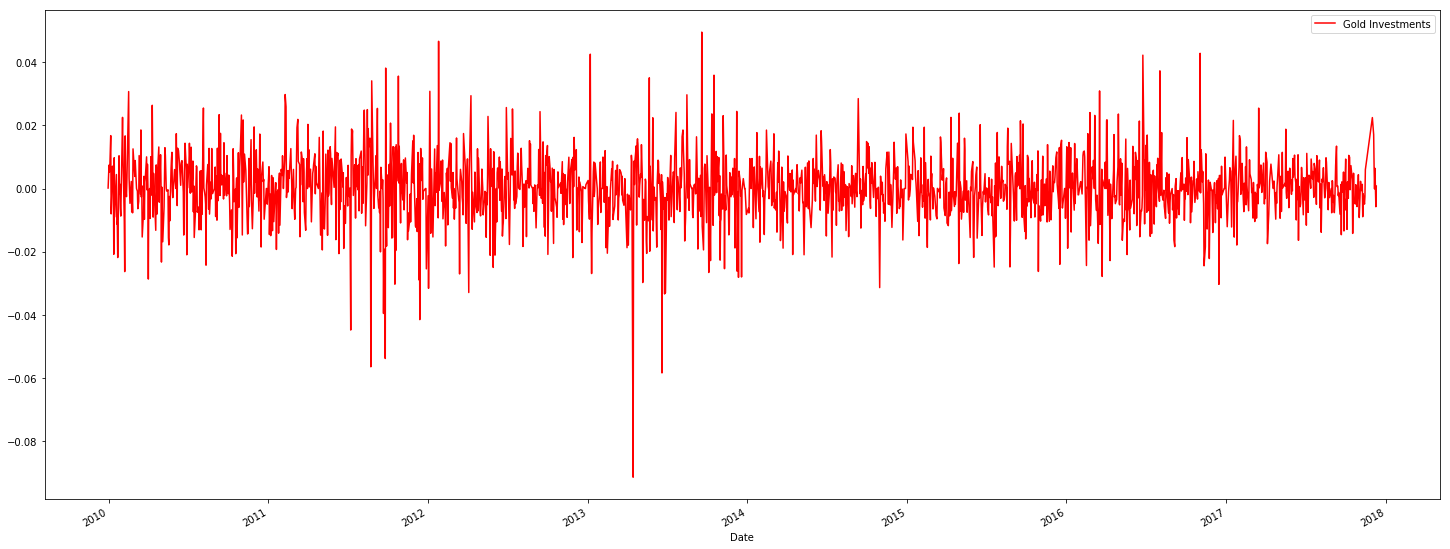

In [21]:
df1.plot(figsize=(25,10),color='r')

### In above plot data looks like seasonal data ,as every year stock goes up and down at a particular month

### Now we will check if data is stationary or not.

In [22]:
# Testing for Stationary
from statsmodels.tsa.stattools import adfuller

In [23]:
#adfuller gives us five results
test_result = adfuller(df1['Gold Investments'])

In [24]:
# Just showing the output of test_result
print("The Values given as output by adfuller is : \n 'ADF Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used' \n\n", test_result)

The Values given as output by adfuller is : 
 'ADF Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used' 

 (-44.89176712875084, 0.0, 0, 1943, {'1%': -3.433720025866274, '5%': -2.863028672007412, '10%': -2.567562509368256}, -12075.32147042362)


### Most Important value is p-value above

In [25]:
#H0: It is non stationary
#H1: It is stationary

def adfuller_test(gold_investments):
    result = adfuller(gold_investments)  #same as above variable name changed
    labels = ['ADF Test Statistic','p-value','Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis (H0), reject the null hypothesis. Data has no unit root and is Stationary")
    else:
        print("Weak evidence against null hypothesis, time series is non-stationary")

In [26]:
adfuller_test(df1['Gold Investments'])

ADF Test Statistic : -44.89176712875084
p-value : 0.0
Lags Used : 0
Number of Observations Used : 1943
Strong evidence against the null hypothesis (H0), reject the null hypothesis. Data has no unit root and is Stationary


### As p value is less then 0.05 we are going to reject the null hypothesis---Stationary Data.

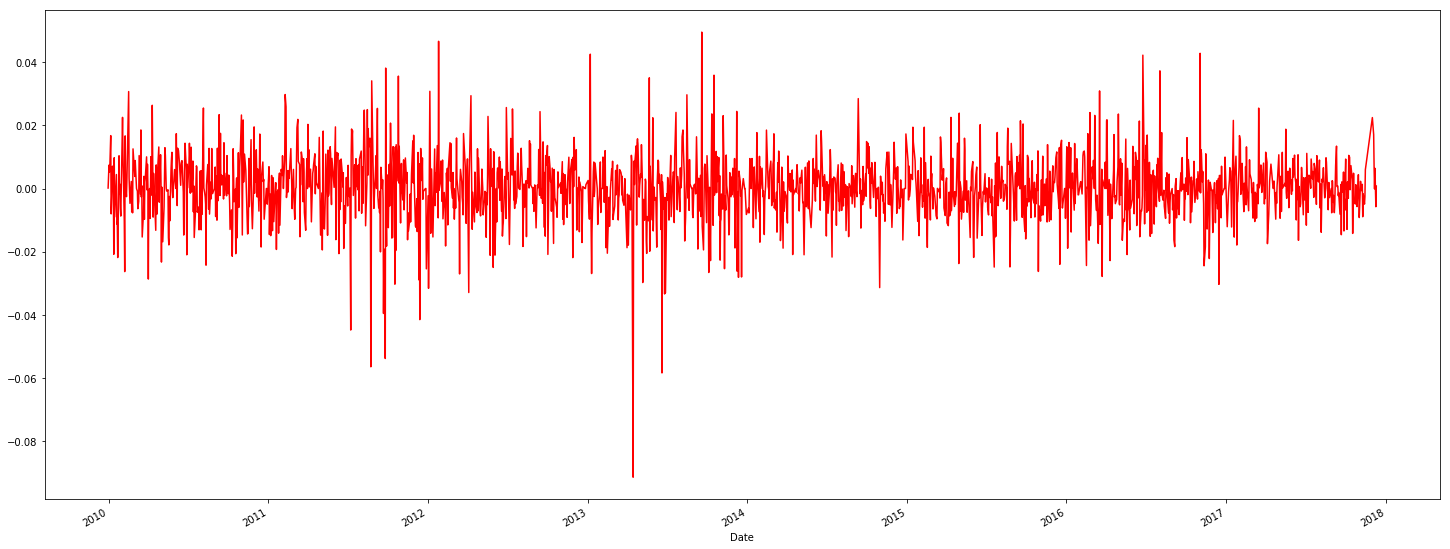

In [27]:
df1['Gold Investments'].plot(figsize=(25,10),color='r')

## Seasonal ARIMA

In [28]:
import statsmodels.api as sm  # SARIMAX - seasonal arimax

In [29]:
model=sm.tsa.statespace.SARIMAX(df1['Gold Investments'],order=(1, 1, 1),seasonal_order=(1,1,1,12)) #(p,d,q,Shift)
results=model.fit()

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:587: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:587: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
C:\Use

In [30]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                   Gold Investments   No. Observations:                 1944
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                6037.471
Date:                            Fri, 23 Oct 2020   AIC                         -12064.942
Time:                                    16:12:06   BIC                         -12037.113
Sample:                                         0   HQIC                        -12054.705
                                           - 1944                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0165      0.020     -0.815      0.415      -0.056       0.023
ma.L1         -0.9958      0.004   -252.350      0.000      -1.004      -0.988
ar.S.L12      -0.0048      0.023     -0.210      0.834      -0.050       0.040
ma.S.L12      -0.9987      0.076    -13.079      0.000      -1.148      -0.849
sigma2         0.0001   8.13e-06     13.391      0.000     9.3e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              2862.16
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               0.62   Skew:                            -0.55
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

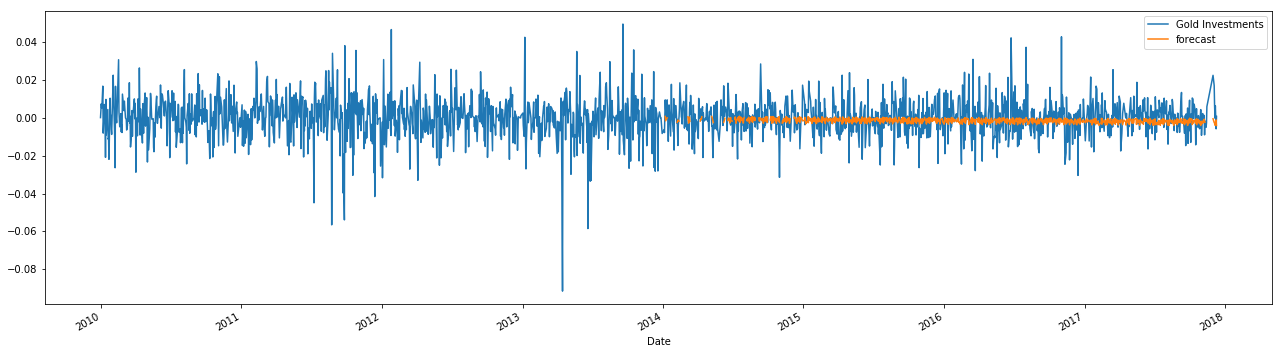

In [34]:
df1['forecast'] = results.predict(start=1100,end=1940,dynamic=True)
df1[['Gold Investments','forecast']].plot(figsize=(22,6))
plt.show()

## Now creating some data to predict future of this

In [35]:
from pandas.tseries.offsets import DateOffset
future_dates=[df1.index[-1] + DateOffset(months=x)for x in range(0,24)]

In [36]:
future_datest_df1=pd.DataFrame(index=future_dates[1:],columns=df1.columns)

In [37]:
future_datest_df1.tail()

,Gold Investments,forecast
2019-06-15,NaN,NaN
2019-07-15,NaN,NaN
2019-08-15,NaN,NaN
2019-09-15,NaN,NaN
2019-10-15,NaN,NaN


In [38]:
future_df1=pd.concat([df1,future_datest_df1])

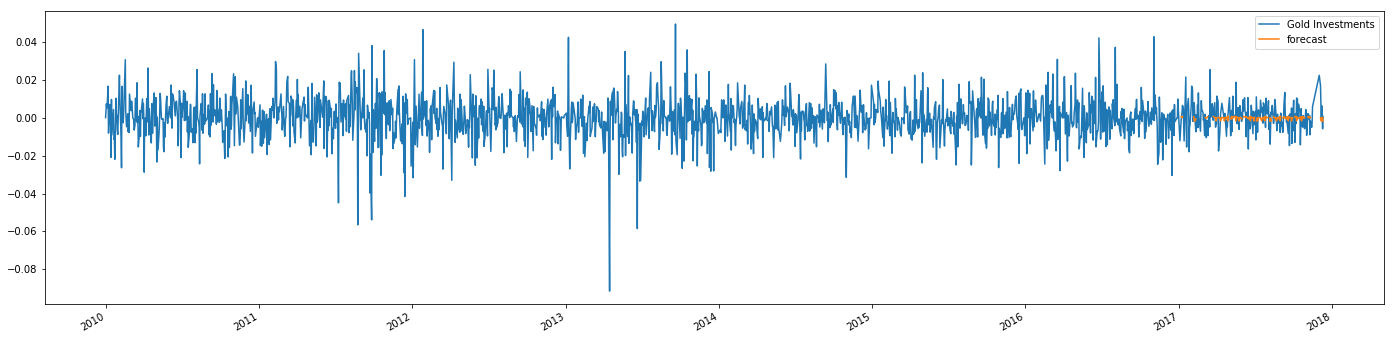

In [40]:
future_df1['forecast'] = results.predict(start = 1783, end = 1930, dynamic= True)  
future_df1[['Gold Investments', 'forecast']].plot(figsize=(24,6))
plt.show()

# Observation:

## Gold Investments stock is slowely changes with respect to time. It goes up and down with respect to time. So the people who wants to invest their money in stock market they go for Gold Investments.